In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

from life.continuous_case import life_insurace

In [2]:
qx = pd.read_csv('life_tables.csv', sep=';', decimal=',')
qx = qx['AT_49_F']

# Atribuição da classe

In [3]:
teste = life_insurace(qx=qx)

## Calculando probabilidades de sobrevivência (ainda caso discreto): ${}_{t}p_{x}, \hspace{.5cm} 0 \leq t \leq \infty$

In [4]:
teste.calc_tpx(t=10, x=30) # probabilidade de alguém de 30 anos sobreviver até os 40 anos 

0.9907098973565888

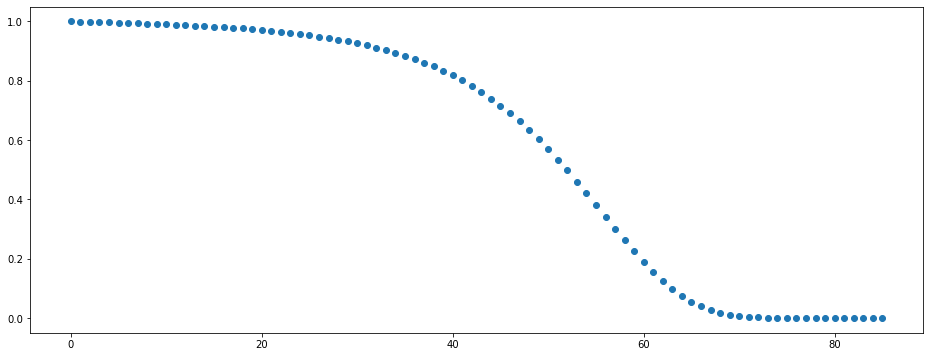

In [5]:
#Exemplo

# #Probabilidadades até o fim da vida (xP0)
fig, ax = plt.subplots(figsize=[16,6])

x = np.arange(0, len(qx)-30)
probs = [teste.calc_tpx(t, x=30) for t in x]
plt.scatter(x, probs);

## Ajustando um polinômio para a função ${}_{x}p_{0}$. Ou seja ${}_{x}p_{0} \rightarrow S_{0}(x)$

In [11]:
teste.fit_Survival_from_birth(deg=8)

teste.Survival_from_birth_Coef

Polynomial([-1.74139967e-14,  6.96624533e-12, -1.09229500e-09,  8.57441531e-08,
       -3.58938289e-06,  7.78093007e-05, -7.72620793e-04,  2.16155860e-03,
        9.96209541e-01], domain=[-1,  1], window=[-1,  1])

Ao ajustar $S_0(x)$, automaticamente a função $S_x(t)$ é criada como ``Survival_from_age``.

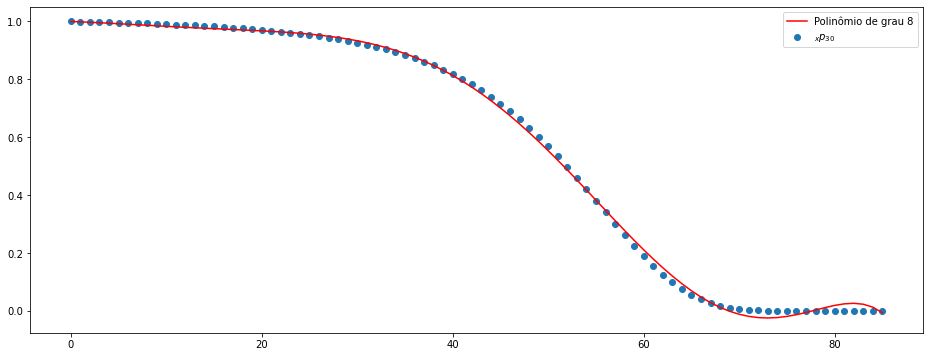

In [12]:
fig, ax = plt.subplots(figsize=[16,6])

plt.scatter(x, probs, label=r'${}_{x}p_{30}$');
plt.plot(x, teste.Survival_from_age(age=30, to=x), color='red', label=f'Polinômio de grau {teste.Survival_from_birth_Coef.degree()}')
plt.legend();

# Força de mortalidade $\mu_x(t)$

In [8]:
teste.mu_force(10) 

0.0006327063699694133

# Definindo a integral que calcula $\bar{A}_{x}$

In [9]:
teste.define_integral(delta=.1)

# Calculando o prêmio

In [10]:
teste.premium(contract=np.infty)

0.004141698098230094